In [ ]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deeplearning/weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for name in df.columns:
    df[name] = le.fit_transform(df[name])
    df[name].fillna(int(df[name].median()), inplace=True)

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,213,262,6,358,145,13,21,13,...,71,22,215,232,8,10,224,262,0,0
1,397,2,153,284,0,358,145,14,21,6,...,44,25,244,239,10,10,227,287,0,0
2,398,2,208,290,0,358,145,15,22,13,...,38,30,214,248,10,2,265,276,0,0
3,399,2,171,313,0,358,145,4,10,9,...,45,16,314,290,10,10,236,309,0,0
4,400,2,254,356,10,358,145,13,19,1,...,82,33,246,221,7,8,233,341,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Date           145460 non-null  int64
 1   Location       145460 non-null  int64
 2   MinTemp        145460 non-null  int64
 3   MaxTemp        145460 non-null  int64
 4   Rainfall       145460 non-null  int64
 5   Evaporation    145460 non-null  int64
 6   Sunshine       145460 non-null  int64
 7   WindGustDir    145460 non-null  int64
 8   WindGustSpeed  145460 non-null  int64
 9   WindDir9am     145460 non-null  int64
 10  WindDir3pm     145460 non-null  int64
 11  WindSpeed9am   145460 non-null  int64
 12  WindSpeed3pm   145460 non-null  int64
 13  Humidity9am    145460 non-null  int64
 14  Humidity3pm    145460 non-null  int64
 15  Pressure9am    145460 non-null  int64
 16  Pressure3pm    145460 non-null  int64
 17  Cloud9am       145460 non-null  int64
 18  Cloud3pm       145460 no

In [ ]:
target = df.pop('RainTomorrow')
features = df


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
features = mm.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split


x,x_test,y,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2, random_state=42)

features.shape

(145460, 22)

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
activation ='relu'
model.add(keras.layers.Flatten(input_shape=[22]))
model.add(keras.layers.Dense(400,activation=activation))
model.add(keras.layers.Dense(200,activation=activation))
model.add(keras.layers.Dense(100,activation=activation))
model.add(keras.layers.Dense(50,activation=activation))
model.add(keras.layers.Dense(4,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 22)                0         
                                                                 
 dense_5 (Dense)             (None, 400)               9200      
                                                                 
 dense_6 (Dense)             (None, 200)               80200     
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 50)                5050      
                                                                 
 dense_9 (Dense)             (None, 4)                 204       
                                                                 
Total params: 114754 (448.26 KB)
Trainable params: 114

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs=20 )

Epoch 1/20
2910/2910 [==============================] - 17s 5ms/step - loss: 0.4443 - accuracy: 0.8209 - val_loss: 0.4440 - val_accuracy: 0.8197
Epoch 2/20
2910/2910 [==============================] - 15s 5ms/step - loss: 0.4177 - accuracy: 0.8301 - val_loss: 0.4030 - val_accuracy: 0.8323
Epoch 3/20
2910/2910 [==============================] - 15s 5ms/step - loss: 0.4085 - accuracy: 0.8329 - val_loss: 0.4102 - val_accuracy: 0.8235
Epoch 4/20
2910/2910 [==============================] - 15s 5ms/step - loss: 0.4023 - accuracy: 0.8347 - val_loss: 0.4018 - val_accuracy: 0.8335
Epoch 5/20
2910/2910 [==============================] - 17s 6ms/step - loss: 0.3974 - accuracy: 0.8360 - val_loss: 0.3972 - val_accuracy: 0.8337
Epoch 6/20
2910/2910 [==============================] - 16s 5ms/step - loss: 0.3946 - accuracy: 0.8379 - val_loss: 0.3902 - val_accuracy: 0.8392
Epoch 7/20
2910/2910 [==============================] - 15s 5ms/step - loss: 0.3912 - accuracy: 0.8381 - val_loss: 0.3968 - val_ac

In [ ]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

910/910 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Accuracy: 0.8401278702048673
precision: 0.8401278702048673
recall: 0.8401278702048673


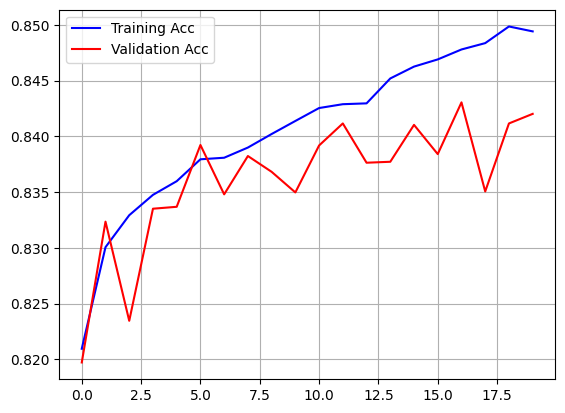

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],c='b')
plt.plot(history.history['val_accuracy'],c='r')
plt.grid()
plt.legend(['Training Acc','Validation Acc'])

accuracy = accuracy_score(y_test, y_pred )
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print(f"Accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")